# PIMC Densities inside Nanopores

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.colors as mcolors
import matplotlib.lines as mlines

import dgutils
from dgutils import colors as colortools
from numpy import pi as π
from wetting_utils import *
from collections import defaultdict
import matplotlib.transforms as mtransforms
from heprops import helium,potential
from pimcscripts import pimchelp


%config InlineBackend.figure_format = 'svg'
%matplotlib inline

## Load all the radial density data from disk

In [2]:
L = 25 # Å
element = ['Ar','Cs']
R = np.array([6.0,8.0])
μ = np.array([-5.0,-18.0,-40.0, -58.0])

ϱ = {}
est = {}
μval = {}
μmin_max = {}
N = {}

def lab(element,R):
    return f'{element} {R:.1f} Å'

for el in element:
    μmin = []
    μmax = []
    for cR in R:
        ϱ[lab(el,cR)] = pimchelp.PIMCResults(f'../data/pimc/{el}R{int(cR)}/radial-u-reduce.dat')
        est[lab(el,cR)] = pimchelp.PIMCResults(f'../data/pimc/{el}R{int(cR)}/estimator-u-reduce.dat')
        
        # we get a vector of μ values from the params
        μval[lab(el,cR)] = np.array([float(par.split("=", 1)[-1]) for par in ϱ[lab(el,cR)].params])
        μmin.append(μval[lab(el,cR)].min())
        μmax.append(μval[lab(el,cR)].max())

        # get the minimum and maximum # particles for each element and radius
        N[lab(el,cR)] = np.array([normalize_psi_PIMC(ϱ[lab(el,cR)].y(par),ϱ[lab(el,cR)].x(par)) for par in ϱ[lab(el,cR)].params])

    μmin_max[el] = (np.min(μmin),np.max(μmax))
        

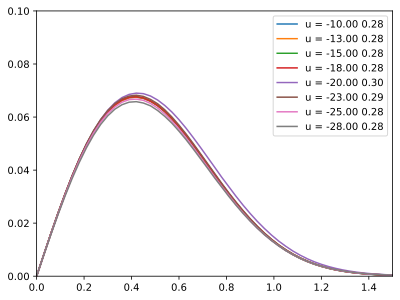

In [3]:
el,cR = 'Ar',6.0

for iμ in range(-25,-17):
    _r,_ρ = ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[iμ])
    Δr = _r[1] - _r[0]
    ρ1d = 2*π*np.sum(_r[:55]*_ρ[:55])*Δr

    plt.plot(_r, _r*_ρ, '-', label=ϱ[lab(el,cR)].params[iμ]+f' {ρ1d:.2f}')
    plt.xlim(0,1.5)
    plt.ylim(0,0.1)
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-12]), '-', label=ϱ[lab(el,cR)].params[-12])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-11]), '-', label=ϱ[lab(el,cR)].params[-11])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-10]), '-', label=ϱ[lab(el,cR)].params[-10])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-9]), '-', label=ϱ[lab(el,cR)].params[-9])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-8]), '-', label=ϱ[lab(el,cR)].params[-8])
# plt.plot(*ϱ[lab(el,cR)].pdata(ϱ[lab(el,cR)].params[-7]), '-', label=ϱ[lab(el,cR)].params[-7])



plt.legend()

### We identify some interesting values of $\mu$ we want to highlight

In [19]:
num_particle = {lab('Ar',6.0): [2,11,30,36,53,61],lab('Ar',8.0): [3,13,43,87,104],
                lab('Cs',6.0): [2,3,6,8],lab('Cs',8.0): [2,4,10,20,30,42]}

hl_idx = defaultdict(list)
for el in element:
    for cR in R:
        Nint = np.array(np.rint(N[lab(el,cR)]), dtype=int)
        print(f'{lab(el,cR)}: N = {Nint}')
        for _n in num_particle[lab(el,cR)]:
            #print(_n, np.where(Nint == _n))
            hl_idx[lab(el,cR)].append(int(np.where(Nint == _n)[0][0]))

Ar 6.0 Å: N = [54 61 61 57 58 58 58 58 58 59 59 56 56 56 56 54 55 53 53 46 44 40 36 34
 33 30 11  2  0  0]
Ar 8.0 Å: N = [104 106 106 105 102 104 101 102  98  96  94  92  91  88  87  79  65  64
  62  59  56  53  51  43  13   3   0   0   0   0   0]
Cs 6.0 Å: N = [7 7 7 7 7 7 7 7 7 7 7 8 8 8 8 7 7 7 7 7 7 7 7 6 6 6 6 6 6 6 6 6 6 6 5 5 4
 3 2 1 1]
Cs 8.0 Å: N = [40 40 40 40 40 41 41 41 41 42 42 42 42 43 39 39 39 39 39 38 38 37 37 37
 37 36 36 36 35 35 35 35 34 34 34 33 33 33 32 32 32 31 31 31 30 30 30 30
 29 29 29 28 28 28 28 27 27 27 26 26 26 26 25 25 25 24 24 24 23 23 23 22
 22 22 21 21 21 20 20 19 19 18 17 16 16 15 14 13 11 10  9  8  7  6  6  5
  5  4  4  3  3  3  3  2  2  2  2  2  2  2  1  1  1  1  1  1  1  1  1]


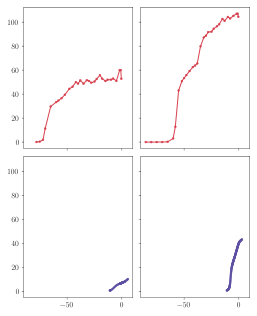

In [20]:
with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(2,2,figsize=(figsize[0],2*figsize[1]), sharex=True, sharey=True, constrained_layout=True)

    for iel,el in enumerate(element):
        col = element_colors[el]
        for iR,cR in enumerate(R):
            x,y,Δy = est[lab(el,cR)].data['u'], est[lab(el,cR)].data['N'],est[lab(el,cR)].data['ΔN']
            ax[iel,iR].errorbar(x,y,Δy,marker='o', color=col, label=f'{el} {cR:.1f} Å', lw=None)

## Plot $\rho$ vs. $r$ for differrent $\mu$

Ar, R = 6.0:  N_min = 0.00, N_max = 61.24
Ar, R = 8.0:  N_min = 0.00, N_max = 106.43
Cs, R = 6.0:  N_min = 0.95, N_max = 8.01
Cs, R = 8.0:  N_min = 0.65, N_max = 42.72


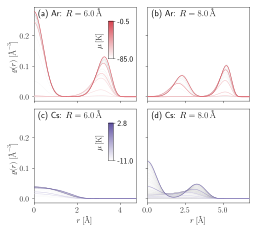

In [21]:
import matplotlib.colors as mcolors
import matplotlib.cm as cm
import matplotlib.transforms as mtransforms

with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(2,2,figsize=(figsize[0],0.9*figsize[0]), sharex=False, sharey=True, constrained_layout=True)
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    plab = 'abcd'

    iax = 0
    for iel,el in enumerate(element):

        # Create custom colormaps for each element colorbar
        base_col = np.array(mcolors.to_rgb(element_colors[el]))
        cmap_el = mcolors.LinearSegmentedColormap.from_list("el_alpha", [(1,1,1), base_col])

        for iR,cR in enumerate(R):     

            if iel == 0:
                ax[0,iR].set_xticklabels([])

            # create panel labels
            ax[iel,iR].text(0.025, 1.0, f'({plab[iax]}) {el}: ' + f'$R = {cR:.1f}\,$'+r'${\rm \AA}$', transform=ax[iel,iR].transAxes + trans)

            # set x-axis limits
            ax[iel,iR].set_xlim(0,cR-1.25)

            # print out N_min,N_max for each element and radius
            print(f'{el}, R = {cR}:  N_min = {N[lab(el,cR)].min():.2f}, N_max = {N[lab(el,cR)].max():.2f}')
                   
            for iμ,μkey in enumerate(ϱ[lab(el,cR)].params):    

                μlab = r'$\mu = $' + f'{μval[lab(el,cR)][iμ]:.2f}' + r'$\, {\rm K}$'

                α = ((μval[lab(el,cR)][iμ]-μmin_max[el][0])/np.abs(μmin_max[el][0]-μmin_max[el][1]) + 0.01)/1.01
                norm_α = mcolors.Normalize(vmin=α.min(), vmax=α.max())
                zorder=int(100*α)
                _c = colortools.get_alpha_hex(element_colors[el], α)

                if iμ in hl_idx[lab(el,cR)]:
                    real_α = 1.0
                    lw=0.5
                else:
                    real_α = 0.2
                    _c = '#aaaaaa'
                    lw = 0.2
                    zorder = -10
                ax[iel,iR].plot(*ϱ[lab(el,cR)].pdata(μkey), label=μlab, color=_c, lw=lw, 
                                marker='None', zorder=zorder, alpha=real_α)

            ax[-1,iR].set_xlabel(r'$r\;[{\rm \AA}] $')
            if iR == 0:
                cax = ax[iel,iR].inset_axes([0.725, 0.45, 0.05, 0.4])
                cb = fig.colorbar(cm.ScalarMappable(norm=norm_α, cmap=cmap_el),cax=cax, orientation='vertical')
                cb.set_label(r'$\mu\, [{\rm K}]$', rotation=90, labelpad=5)
                cb.ax.yaxis.set_label_position('left')  
                cb.set_ticks([cb.mappable.norm.vmin,cb.mappable.norm.vmax])
                cb.set_ticklabels([f"{μmin_max[el][0]:.1f}", f"{μmin_max[el][1]:.1f}"])
    
            # increment axis counter
            iax += 1

        ax[iel,0].set_ylabel(r'$\varrho(r)\; [{\rm \AA}^{-3}]$')
    
    plt.savefig('../figures/rho_vs_r_mu_Teq2.pdf')

### Get the energy scale corresponding to the minimum of the He-He interaction potential

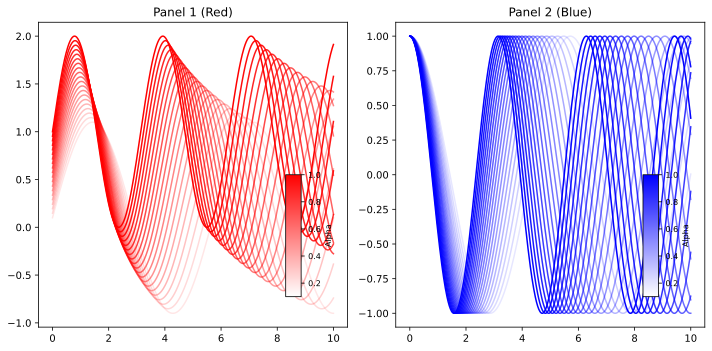

In [111]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as mcolors
import matplotlib.cm as cm

# Fake data
x = np.linspace(0, 10, 500)
n_curves = 20
y1 = [np.sin(x + i * 0.3) + i * 0.05 for i in range(n_curves)]
y2 = [np.cos(x + i * 0.2) * np.exp(-0.05 * i) for i in range(n_curves)]

# Base colors
base_red = np.array(mcolors.to_rgb("red"))
base_blue = np.array(mcolors.to_rgb("blue"))

# Create custom colormaps for the colorbars
cmap_red = mcolors.LinearSegmentedColormap.from_list("red_alpha", [(1,1,1), base_red])
cmap_blue = mcolors.LinearSegmentedColormap.from_list("blue_alpha", [(1,1,1), base_blue])

# Alpha values to use
alpha_values = np.linspace(0.1, 1.0, n_curves)
norm_alpha = mcolors.Normalize(vmin=alpha_values.min(), vmax=alpha_values.max())

fig, axes = plt.subplots(1, 2, figsize=(10, 5))

# --- Panel 1 ---
for a in alpha_values:
    axes[0].plot(x, np.sin(x * (1+a)) + a, color=base_red, alpha=a)

# Inset colorbar (showing alpha scale)
cax1 = axes[0].inset_axes([0.8, 0.1, 0.05, 0.4])
cb1 = fig.colorbar(cm.ScalarMappable(norm=norm_alpha, cmap=cmap_red),
                   cax=cax1, orientation='vertical')
cb1.set_label("Alpha", fontsize=8)
cb1.ax.tick_params(labelsize=8)

# --- Panel 2 ---
for a in alpha_values:
    axes[1].plot(x, np.cos(x * (1+a)), color=base_blue, alpha=a)

# Inset colorbar
cax2 = axes[1].inset_axes([0.8, 0.1, 0.05, 0.4])
cb2 = fig.colorbar(cm.ScalarMappable(norm=norm_alpha, cmap=cmap_blue),
                   cax=cax2, orientation='vertical')
cb2.set_label("Alpha", fontsize=8)
cb2.ax.tick_params(labelsize=8)

# Titles
axes[0].set_title("Panel 1 (Red)")
axes[1].set_title("Panel 2 (Blue)")

plt.tight_layout()
plt.show()


In [ ]:
V = potential.szalewicz_2012
__r = np.linspace(2.5,5,1000)
V_min = np.min(V(__r))`a`

## Create the Combined Plot

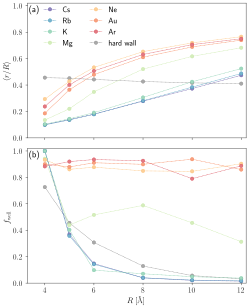

In [242]:
atom_list = ['Cs','Rb','K','Mg','Ne','Au','Ar','hwall']

with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(figsize[0],2*figsize[1]), sharex=True, sharey=True, constrained_layout=True)
    
    for el in atom_list:
        col = element_colors[el]

        zorder = -1 if el == 'hwall' else 0
        elab = el if el != 'hwall' else 'hard wall'

        ax1.plot(R,averoR[el],'o:', label=elab, color=col,zorder=zorder,
                 mfc=colortools.get_alpha_hex(col,0.7), markersize=3.5, linewidth=0.5, mec=col)
        ax2.plot(R,fwell[el],'o:', label=elab, color=col,zorder=zorder,
                 mfc=colortools.get_alpha_hex(col,0.7), markersize=3.5, linewidth=0.5, mec=col)

    ax1.set_ylabel(r'$\langle r/R\rangle$')
    ax2.set_ylabel(r'$f_{\rm well}$')
    ax2.set_xlabel(r'$R \; [\rm \AA]$')
    ax1.set_xlim(3.3,12.2)
    ax2.set_ylim(0,1.02)
    ax1.legend(handlelength=1.5, ncols=2, loc=(0.06,0.65))

    # Add a possible labels
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans)
    ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans)
    plt.savefig('../figures/Wetting-parameters_combined_R.pdf')

## Phase Diagram using $f_{\rm well}$

In [243]:
pd_data = []
for el in elements:
    #if el != 'hwall':    
    for i,cR in enumerate(R):
        pd_data.append([cR,U_pore_min[el][i]/V_min,fwell[el][i]])

pd_data = np.array(pd_data)

### Interoplate on a grid to form the decision boundaries

In [244]:
from matplotlib.colors import ListedColormap, BoundaryNorm
from scipy.interpolate import griddata
from scipy.ndimage import gaussian_filter

x = pd_data[:,0]
y = pd_data[:,1]
f = pd_data[:,2]

# The phase cutoffs
a, b, c, d = 0, 0.4, 0.6, 1.   # phase1: a<f<b, phase2: b<f<c, phase3: c<f<d

# Interpolate to grid
nx, ny = 100, 100
xi = np.linspace(R.min()-0.5, R.max()+0.5, nx)
yi = np.linspace(pd_data[:,1].min(), pd_data[:,1].max()+1, ny)
Xi, Yi = np.meshgrid(xi, yi)

Fi_lin = griddata(points=(x,y),values=f, xi=(Xi, Yi),method='linear')

# nearest-neighbor for extrapolation 
Fi_nn  = griddata((x, y), f, (Xi, Yi), method='nearest')

# fill NaNs from linear with nearest (keeps phases unchanged outside)
Fi = np.where(np.isnan(Fi_lin), Fi_nn, Fi_lin)

# Gentle smoothing (comment out if you want raw interpolation)
Fi = gaussian_filter(Fi, sigma=2.5)

# Mask out areas outside convex hull (griddata returns NaN there)
Fi_masked = np.ma.masked_invalid(Fi)

# Discrete phase coloring
cmap = ListedColormap([colortools.get_alpha_hex(element_colors['Cs'],0.35), 
                       colortools.get_alpha_hex(element_colors['Mg'],0.35), 
                       colortools.get_alpha_hex(element_colors['Ar'],0.35)])
bounds = [a, b, c, d]
_norm = BoundaryNorm(bounds, cmap.N)

## The wetting phase diagram

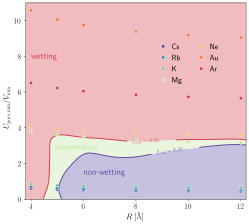

In [245]:
with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig, ax = plt.subplots(constrained_layout=True, figsize=(figsize[0],0.9*figsize[0]))

    # Use contourf for crisp discrete regions
    cf = ax.contourf(Xi, Yi, Fi_masked, levels=bounds, cmap=cmap, norm=_norm)

    # Phase boundary lines (f=b and f=c)
    cs = ax.contour(Xi, Yi, Fi_masked, levels=[b], colors=element_colors['Cs'], linewidths=1)
    ax.clabel(cs, inline=True, fmt={b: rf"$f_{{\rm well}}={b:.2f}$"}, fontsize=6)

    cs = ax.contour(Xi, Yi, Fi_masked, levels=[c], colors=element_colors['Ar'], linewidths=1)
    ax.clabel(cs, inline=True, fmt={c: rf"$f_{{\rm well}}={c:.2f}$"}, fontsize=6)

    # The raw fwell data points
    for el in atom_list:
        col = element_colors[el]
        elab = el if el != 'hwall' else '__nolabel__'
        if el != 'hwall':
            #ax.plot(R,U_pore_min[el]/V_min,'o', label=elab, color=col,zorder=1000,
            #        mfc=colortools.get_alpha_hex(col,0.7), markersize=2.5, mec=col)
            ax.plot(R,U_pore_min[el]/V_min,'o', label=elab,zorder=1000,
                    mfc=col, markersize=3.5, mec='w', mew=0.3)


    # set cbar_on = True to show colorbar
    cbar_on = False
    if cbar_on:
        # Colorbar with phase labels
        # Put ticks in the middle of each phase interval
        ticks = [(a+b)/2, (b+c)/2, (c+d)/2]
        labels = ["non-wetting", "intermediate", "wetting"]

        mappable = plt.cm.ScalarMappable(norm=_norm, cmap=cmap)
        mappable.set_array([])  # needed for older Matplotlib
        cbar = fig.colorbar(mappable, ax=ax, ticks=ticks, boundaries=bounds, spacing='proportional', 
                            pad=0.01)
        plt.setp(cbar.ax.get_yticklabels(), rotation=90, va='center', ha='center')
        cbar.ax.set_yticklabels(labels)
    else:
        ax.text(4,8,'wetting',ha='left',va='center', color=element_colors['Ar'])
        ax.text(4.9,2.9,'intermediate',ha='left',va='center', color=element_colors['Mg'])
        ax.text(6,1.5,'non-wetting',ha='left',va='center', color=element_colors['Cs'])


    ax.set_xlabel(r"$R\; [{\rm \AA}]$")
    ax.set_ylabel(r"$U_{\rm pore, min}/V_{\rm min}$")
    ax.legend(ncol=2, loc=(0.6,0.57),frameon=False, handlelength=0.5)

    ax.set_xlim(3.8,12.2)
    ax.set_ylim(0,11)

    plt.savefig('../figures/wetting_phase_diagram.pdf')


## Everything below this line is old code that has been replaced or is no longer needed.

In [ ]:
MgMeanrbyR = [0.135, 0.22, 0.348, 4.164/8, 6.169/10, 0.68]
CsMeanrbyR = [0.1, 0.138, 0.180, 2.223/8, 3.729/10 ,0.474]
KMeanrbyR = [0.413/4, 0.721/5, 1.148/6, 2.446/8, 4.246/10, 6.292/12]
RbMeanrbyR = [0.098, 0.136, 0.119, 2.248/8,  3.839/10 ,0.487]
ArMeanrbyR = [0.236, 0.397, 0.502, 0.657, 0.700, 0.751]
AuMeanrbyR = [0.186,0.364,0.574, 0.639, 0.685, 0.740]
NeMeanrbyR = [0.293,0.428, 0.533, 0.653, 0.719, 0.766]
hwallMeanrbyR = [1.827/4, 2.259/5, 2.654/6, 3.413/8, 4.164/10, 4.927/12]

In [ ]:
R = np.array([4.00, 5.00, 6.00, 8.00, 10.0,12.0])

In [ ]:
MgSpread = [0.264, 0.464, 0.565, 0.554, 0.564, 0.557]
CsSpread = [0.341, 0.342, 0.513, 0.911, 1.28, 1.42]
KSpread = [0.209, 0.355, 0.535, 0.929, 1.179, 1.192]
RbSpread = [0.201, 0.337, 0.508, 0.906, 1.250, 1.340]
ArSpread = [0.38, 0.438, 0.432, 0.442, 0.445, 0.449]
AuSpread = [0.322,0.372,0.367,0.365, 0.370, 0.374]
NeSpread = [0.435, 0.519, 0.488, 0.500, 0.489, 0.509]
hwallSpread = [0.826, 1.016, 1.206, 1.586, 1.961, 2.335]

In [ ]:
MgOvW = np.array([0.993, 0.708, 0.07, 0, 0, 0])
CsOvW = np.array([1, 0.969, 0.59, 0.126, 0.036, 0.03])
KOvW = np.array([0.99, 0.958, 0.539, 0.119, 0.014, 0])
RbOvW = np.array([0.999, 0.972, 0.595, 0.12, 0.029, 0.002])
ArOvW = np.array([0.776, 0.092, 0.001, 0, 0, 0])
AuOvW = np.array([0.94, 0.118, 0, 0, 0, 0])
NeOvW = np.array([0.547, 0.084, 0.001, 0, 0, 0])
hwallOvW = np.array([0.273, 0.217, 0.122, 0.088, 0.054, 0.025])

In [ ]:
RArmet = np.array([1.750, 1.826, 1.857, 1.83, 1.8, 1.728])/2
RAumet = np.array([1.792, 1.770, 1.845, 1.734, 1.7, 1.682])/2
RCsmet = np.array([2.0, 0.746, 0.295, 0.08, 0.0440, 0.032])/2
RKmet = np.array([2.0, 0.809, 0.196, 0.141, 0.099, 0.078])/2
RMgmet = np.array([1.887, 0.877, 1.03, 1.185, 0.878,0.619])/2
RRbmet = np.array([2.0, 0.725, 0.285, 0.081, 0.048, 0.035])/2
RNemet = np.array([1.866, 1.735, 1.761, 1.718, 1.740, 1.800])/2
hwallmet = np.array([2.00, 1.77, 1.418, 0.676, 0.410, 0.220])/2
RMat1met = np.array([2.00,1.685,1.294,1.14,1.065,0.968])/2
RMat2met = np.array([2.00,1.811,1.328,0.727,0.36,0])/2

In [ ]:
RArmet2 = np.array([0.366, 0.389, 0.509, 0.547, 0.498, 0.182])
RAumet2 = np.array([0.277, 0.377, 0.317, 0.357, 0.320, 0.411])
RCsmet2 = np.array([0.342, 0.033, 0.009, 0.003, 0, 0] )
RKmet2 = np.array([0.368, 0.015, 0.004, 0.001, 0.001, 0])
RMgmet2 = np.array([0.192, 0.029, 0.079, 0.035, 0.038, 0.007])
RRbmet2 = np.array([0.329, 0.030, 0.008, 0.003, 0, 0])
RNemet2 = np.array([0.452, 0.530, 0.461, 0.433, 0.328, 0.336])

In [ ]:
with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,((ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8)) = plt.subplots(4,2,figsize=(2*figsize[0],4*figsize[1]), constrained_layout=True, sharey=True)
    #fig = plt.figure()
    #gs = fig.add_gridspec(4, 2, hspace=0, wspace=0)
    #(ax1, ax2), (ax3, ax4), (ax5, ax6), (ax7,ax8) = gs.subplots(sharex='col', sharey='row')
    #fig.suptitle('Wetting characteristics', x = 0.5, y = 0.93)
    ax1.plot(R, CsMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#5E4FA2',alpha=1.0)
    ax1.plot(R, CsSpread, '^-',label=r'Spread',color='#5E4FA2',alpha=0.7)
    ax1.plot(R, CsOvW, 'o-', label=r'OnevdW',color='#5E4FA2',alpha=0.4)
    ax1.plot(R, RCsmet, 'D-', label = r'Density in the well',color='#5E4FA2',alpha=0.2)
    ax1.text(0.1, 0.8, 'Cs', transform=ax1.transAxes, fontsize='xx-large')
    ax2.plot(R, MgMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#79C9A4')
    ax2.plot(R, MgSpread, '^-', label=r'Spread',color='#79C9A4',alpha=0.7)
    ax2.plot(R, MgOvW, 'o-', label=r'OnevdW',color='#79C9A4',alpha=0.4)
    ax2.plot(R, RMgmet, 'D-', label = r'Density in the well',color='#79C9A4',alpha=0.2)
    ax2.legend()
    ax2.text(0.1, 0.8, 'Mg', transform=ax2.transAxes, fontsize='xx-large')
    ax3.plot(R, RbMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#3C93B8')
    ax3.plot(R, RbSpread, '^-', label=r'Spread',color='#3C93B8',alpha=0.7)
    ax3.plot(R, RbOvW, 'o-', label=r'OnevdW',color='#3C93B8',alpha=0.4)
    ax3.plot(R, RRbmet, 'D-', label = r'Density in the well',color='#3C93B8',alpha=0.2)
    ax3.text(0.1, 0.8, 'Rb', transform=ax3.transAxes, fontsize='xx-large')
    ax4.plot(R, KMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#C2E69F')
    ax4.plot(R, KSpread, '^-', label=r'Spread',color='#C2E69F',alpha=0.7)
    ax4.plot(R, KOvW, 'o-', label=r'OnevdW',color='#C2E69F',alpha=0.4)
    ax4.plot(R, RKmet, 'D-', label = r'Density in the well',color='#C2E69F',alpha=0.2)
    ax4.text(0.1, 0.8, 'K', transform=ax4.transAxes, fontsize='xx-large')
    ax5.plot(R, ArMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#D7414E')
    ax5.plot(R, ArSpread, '^-', label=r'Spread',color='#D7414E',alpha=0.7)
    ax5.plot(R, ArOvW, 'o-', label=r'OnevdW',color='#D7414E',alpha=0.4)
    ax5.plot(R, RArmet, 'D-', label = r'Density in the well',color='#D7414E',alpha=0.2)
    ax5.text(0.1, 0.8, 'Ar', transform=ax5.transAxes, fontsize='xx-large')
    ax6.plot(R, AuMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#F57949')
    ax6.plot(R, AuSpread, '^-', label=r'Spread',color='#F57949',alpha=0.7)
    ax6.plot(R, AuOvW, 'o-', label=r'OnevdW',color='#F57949',alpha=0.4)
    ax6.plot(R, RAumet, 'D-', label = r'Density in the well',color='#F57949',alpha=0.2)
    ax6.text(0.1, 0.8, 'Au', transform=ax6.transAxes, fontsize='xx-large')
    ax7.plot(R, NeMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='#FDBB6C')
    ax7.plot(R, NeSpread, '*-', label=r'Spread',color='#FDBB6C',alpha=0.7)
    ax7.plot(R, NeOvW, '*-', label=r'OnevdW',color='#FDBB6C',alpha=0.4)
    ax7.plot(R, RNemet, '*-', label = r'Density in the well',color='#FDBB6C',alpha=0.2)
    ax7.text(0.1, 0.8, 'Ne', transform=ax7.transAxes, fontsize='xx-large')
    ax8.plot(R, hwallMeanrbyR, '*-', label=r'$\frac{r_0}{R}$',color='k')
    ax8.plot(R, hwallSpread, '^-', label=r'Spread',color='k',alpha=0.7)
    ax8.plot(R, hwallOvW, 'o-', label=r'OnevdW',color='k',alpha=0.4)
    ax8.plot(R, hwallmet, 'D-', label = r'Density in the well',color='k',alpha=0.2)
    ax8.text(0.1, 0.8, 'Hardwall', transform=ax8.transAxes, fontsize='xx-large')
    
    
    for ax in fig.get_axes():
        ax.label_outer()
        ax.set_ylim(0,1.5)
    
    plt.savefig('../figures/Parameter_evolution.pdf')
    plt.show()

In [ ]:
MgMeanrbyR = [0.135, 0.22, 0.348, 4.164/8, 6.169/10, 0.68]
CsMeanrbyR = [0.1, 0.138, 0.180, 2.223/8, 3.729/10 ,0.474]
KMeanrbyR = [0.413/4, 0.721/5, 1.148/6, 2.446/8, 4.246/10, 6.292/12]
RbMeanrbyR = [0.098, 0.136, 0.119, 2.248/8,  3.839/10 ,0.487]
ArMeanrbyR = [0.236, 0.397, 0.502, 0.657, 0.700, 0.751]
AuMeanrbyR = [0.186,0.364,0.574, 0.639, 0.685, 0.740]
NeMeanrbyR = [0.293,0.428, 0.533, 0.653, 0.719, 0.766]
hwallMeanrbyR = [1.827/4, 2.259/5, 2.654/6, 3.413/8, 4.164/10, 4.927/12]

In [ ]:
At_list = [CsMeanrbyR,KMeanrbyR, RbMeanrbyR,MgMeanrbyR,AuMeanrbyR,ArMeanrbyR,NeMeanrbyR]
atom_list_name = ['Cs','K','Rb','Mg','Au','Ar','Ne']

cols = ['#5E4Fa2','#C2E69F','#3C93B8', '#79C9A4','#F57949','#D7414E', '#FDBB6C']

#cols[3] = colortools.guzikd['yellow']

fig,ax = plt.subplots()
for i,at in enumerate(At_list):
    ax.plot(1/np.array(R),at,'o-', label=atom_list_name[i], color=cols[i], mec=cols[i], mfc=colortools.get_alpha_hex(cols[i],0.5))

#_R = np.linspace(4,12,100)
#plt.plot(_R,0.05*_R,'k-')
plt.legend()
plt.ylabel(r'$\langle r\rangle / R$')
plt.xlabel(r'$1/R$ (Å)')
plt.xlim(0,0.26)


In [ ]:
with plt.style.context('../include/aps.mplstyle'):
    well_density_list = [RRbmet,RCsmet,RKmet,RMgmet,RAumet,RArmet,RNemet]
    atom_list_name = ['Rb','Cs','K','Mg','Au','Ar','Ne']
    cols = ['#3C93B8','#5E4Fa2','#C2E69F','#79C9A4','#F57949','#D7414E', '#FDBB6C']
    #hwallmet = np.array([2.00, 1.77, 1.418, 0.676, 0.410, 0.220])/2
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(1,1,figsize=(figsize[0],figsize[1]),constrained_layout=True)
    for i,at in enumerate(well_density_list):
        ax.plot(1/np.array(R),at,'o--', label=atom_list_name[i], color=cols[i])
    
    ax.legend()
    ax.set_ylabel(r'Density in the Well')
    ax.set_xlabel(r'$1/R$ (Å)')
    ax.text(0.1,0.96,"Wetting")
    ax.text(0.1,0.15,"Non-Wetting")
    ax.set_xlim(0.08,0.255)
    plt.savefig('../figures/WellDensity.pdf')

In [ ]:
center_density = [CsOvW,KOvW,RbOvW,MgOvW,AuOvW,ArOvW,NeOvW]
fig,ax = plt.subplots()
for i,at in enumerate(center_density):
    ax.plot(1/np.array(R),at,'o-', label=atom_list_name[i], color=cols[i])

plt.legend()
plt.ylabel(r'Density in the Center')
plt.xlabel(r'$1/R$ (Å)')
#plt.savefig('CentralDensity.pdf')

### Plot as 1/R

In [ ]:
import matplotlib.transforms as mtransforms

with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(figsize[0],2*figsize[1]), sharex=True, sharey=True, constrained_layout=True)
    atom_list_name = ['Cs','Rb','K','Mg','Ne','Au','Ar']
    cols = [element_colors[e] for e in atom_list_name]
    #cols = ['#5E4Fa2','#C2E69F','#3C93B8', '#79C9A4','#F57949','#D7414E', '#FDBB6C']
    well_density_list = [RCsmet,RRbmet,RKmet,RMgmet,RNemet,RAumet,RArmet]

    for i,at in enumerate(well_density_list):
        ax2.plot(1/np.array(R),at,'o:', label=atom_list_name[i], color=cols[i],
                 mfc=colortools.get_alpha_hex(cols[i],0.5), markersize=3.5, linewidth=0.5, mec=cols[i])
    ax2.set_ylabel(r'$f_{\rm well}$')

    At_list = [CsMeanrbyR,RbMeanrbyR,KMeanrbyR,MgMeanrbyR,NeMeanrbyR,AuMeanrbyR,ArMeanrbyR]
    for i,at in enumerate(At_list):
        ax1.plot(1/np.array(R),at,'o:', label=atom_list_name[i], color=cols[i], mec=cols[i], 
                 mfc=colortools.get_alpha_hex(cols[i],0.5), markersize=3.5, linewidth=0.5)
    ax1.set_ylabel(r'$\langle r/R\rangle$')
    ax2.set_xlabel(r'$1/R \; [\rmÅ^{-1}]$')
    ax1.set_xlim(0.08,0.2525)
    #ax1.set_ylim(0,0.85)
    ax2.set_ylim(0,1.02)
    ax1.legend(handlelength=1.5)

    # Add a possible labels
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans)
    ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans)
    plt.savefig('../figures/Wetting-parameters_combined.pdf')

### Now plot vs. R

In [ ]:
with plt.style.context('../include/aps.mplstyle'):
    figsize = plt.rcParams['figure.figsize']
    fig,(ax1,ax2) = plt.subplots(2,1,figsize=(figsize[0],2*figsize[1]), sharex=True, sharey=True, constrained_layout=True)
    atom_list_name = ['Cs','Rb','K','Mg','Ne','Au','Ar']
    cols = [element_colors[e] for e in atom_list_name]
    #cols = ['#5E4Fa2','#C2E69F','#3C93B8', '#79C9A4','#F57949','#D7414E', '#FDBB6C']
    well_density_list = [RCsmet,RRbmet,RKmet,RMgmet,RNemet,RAumet,RArmet]

    for i,at in enumerate(well_density_list):
        ax2.plot(np.array(R),at,'o:', label=atom_list_name[i], color=cols[i],
                 mfc=colortools.get_alpha_hex(cols[i],0.7), markersize=3.5, linewidth=0.5, mec=cols[i])
    ax2.set_ylabel(r'$f_{\rm well}$')

    At_list = [CsMeanrbyR,RbMeanrbyR,KMeanrbyR,MgMeanrbyR,NeMeanrbyR,AuMeanrbyR,ArMeanrbyR]
    for i,at in enumerate(At_list):
        ax1.plot(np.array(R),at,'o:', label=atom_list_name[i], color=cols[i], mec=cols[i], 
                 mfc=colortools.get_alpha_hex(cols[i],0.7), markersize=3.5, linewidth=0.5)
    ax1.set_ylabel(r'$\langle r/R\rangle$')
    ax2.set_xlabel(r'$R \; [\rm \AA]$')
    ax1.set_xlim(3.3,12.2)
    #ax1.set_ylim(0,0.85)
    ax2.set_ylim(0,1.02)
    ax1.legend(handlelength=1.5, ncols=2, loc=(0.06,0.65))

    # Add a possible labels
    trans = mtransforms.ScaledTranslation(1/72, -9/72, fig.dpi_scale_trans)
    ax1.text(0.0, 1.0, '(a)', transform=ax1.transAxes + trans)
    ax2.text(0.0, 1.0, '(b)', transform=ax2.transAxes + trans)
    plt.savefig('../figures/Wetting-parameters_combined_R.pdf')

In [ ]:
spread = [CsSpread,KSpread,RbSpread,MgSpread,AuSpread,ArSpread,NeSpread]

fig,ax = plt.subplots()
for i,at in enaumerate(spread):
    ax.plot(R,at,'o-', label=atom_list_name[i], color=cols[i])

plt.legend()
plt.ylabel(r'Spread')
plt.xlabel(r'$R$ [Å]')

In [ ]:
RCspmin = np.array([-6.610,-5.994,-5.646,-5.268,-5.066,-4.939])/-15.789
RMgpmin = np.array([-42.005,-39.510,-38.020,-36.314,-35.358,-34.747])/-15.789
RRbpmin = np.array([-7.510,-6.814,-6.421,-5.992,-5.762,-5.620])/-15.789
RKpmin = np.array([-9.213,-8.420,-7.967,-7.469,-7.200,-7.033])/-15.789
RArpmin = np.array([-71.552,-68.438,-66.499,-64.277,-62.953,-62.137])/-15.789
RAupmin = np.array([-116.370,-110.652,-107.202,-102.345,-100.984,-99.426])/-15.789
RNepmin = np.array([-44.916, -43.207,-42.142,-40.899,-40.162,-39.714])/-15.789
RMat1pmin = np.array([-23.906,-21.925,-20.784,-19.529,-18.850,-18.424])/-15.789
RMat2pmin = np.array([-33.87, -31.06, -29.44, -27.66, -26.703, -26.100])/-15.789

In [ ]:
# make a color map of fixed colors
cm = mcolors.ListedColormap(['blue', '#800080','red'],N=3)
bounds=[0,0.42,0.6,1]
norm = mcolors.BoundaryNorm(bounds, cm.N)

In [ ]:
with plt.style.context('aps'):
    figsize = plt.rcParams['figure.figsize']
    fig,ax = plt.subplots(figsize=(figsize[0],figsize[1]), constrained_layout=True)
    ms = 10
    s = ax.scatter(R,RArpmin,c = RArmet, cmap = cm, norm = norm, marker='p', s=ms,label = 'Ar')
    ax.scatter(R,RCspmin,c = RCsmet, cmap = cm, norm = norm, marker='^', s=ms,label = 'Cs')
    ax.scatter(R,RMgpmin,c = RMgmet, cmap = cm, norm = norm, marker='>', s=ms,label = 'Mg')
    ax.scatter(R,RRbpmin,c = RRbmet, cmap = cm, norm = norm, marker='<', s=ms,label = 'Rb')
    ax.scatter(R,RKpmin,c = RKmet, cmap = cm, norm = norm, marker = '8', s=ms,label = 'K')
    ax.scatter(R,RAupmin,c = RAumet, cmap = cm, norm = norm, marker = 's', s=ms,label = 'Au')
    ax.scatter(R,RNepmin,c = RNemet, cmap = cm, norm = norm, marker = '*', s=ms,label = 'Ne')
    #ax.scatter(R,RMat1pmin,c = RMat1met, cmap = cm, norm = norm, marker = 'd', label = 'Artifical material 1')
    #ax.scatter(R,RMat2pmin,c = RMat2met, cmap = cm, norm = norm, marker = 'D', label = 'Artificial material 2')
    cbar = fig.colorbar(s)
    cbar.set_label(r'$\rho_{\text{well}}$')
    ax.set_xlabel(r'$R$ [Å]')
    ax.set_ylabel(r'$V_{\rm min}/V_{\rm min(He)}$')
    Arleg = mlines.Line2D([], [], color='red', marker='p', ls='', label='Ar')
    Csleg = mlines.Line2D([], [], color='blue', marker='^', ls='', label='Cs')
    Mgleg = mlines.Line2D([], [], color='#800080', marker='>', ls='', label='Mg')
    Rbleg = mlines.Line2D([], [], color='blue', marker='<', ls='', label='Rb')
    Kleg = mlines.Line2D([], [], color='blue', marker='8', ls='', label='K')
    Auleg = mlines.Line2D([], [], color='red', marker='s', ls='', label='Au')
    Neleg = mlines.Line2D([], [], color='red', marker='*', ls='', label='Ne')
    ax.legend(handles = [Arleg, Auleg, Neleg, Mgleg,Kleg,Csleg,Rbleg], loc=(0.775,0.329))
    plt.savefig('../figures/Phasediagram.pdf')

In [ ]:
RArmet = np.array([1.750, 1.826, 1.857, 1.83, 1.8, 1.728,2*1.109])/2
RCsmet = np.array([2.0, 0.746, 0.295, 0.08, 0.0440, 0.032,2*0.768])/2
Rinv = 1/R
print(Rinv)